# GET GENERAL SIGNAL

Authors:

Alberto Padilla Nieto

Marco Antonio Hernani Chavez
    
This jupyter gets the general signal from an emotion in a dataset (this is one way to do it).
Requires a folder that contains all the trials saved as fif files. Gets all the signals on those trials and obtains a general stimulation (a created trial that has all common traits that all the signals in the folder had.

In this case We used the positive trials obtained from the dataset SEED FRA.

In [1]:
import pandas as pd
import os
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft
from scipy.stats import shapiro 
import numpy as np
import mne

from matplotlib import pyplot as plt

In [2]:
def equal_samples(_trial, _n_samples):
    """Equals the number of samples of a trial to a new number
    of samples"""
    if(_trial.shape[1] == _n_samples):
        return _trial
    elif(_trial.shape[1] > _n_samples):
        #If the new number of samples is lower than the actual number of samples
        #we truncate the number of samples
        new_trial = [signal[:_n_samples] for signal in _trial]
        return np.array[new_trial]
    else:
        #If the new number of samples is higher than the actual number of samples
        #For each signal of the trial We repeat their samples until the new lenght (number of samples)
        #is reach
        new_trial = []
        n1 = int(_n_samples // _trial.shape[1])
        n2 = _n_samples % _trial.shape[1]
        for signal in _trial:
            
            new_signal = n1*list(signal)
            new_signal.extend(signal[:n2])
            
            new_trial.append(np.array(new_signal))

        return np.array(new_trial)

In [30]:
def get_general_trial(_trials, _n_receptors, _len_trial):
    """Gets the general trial, using a list that contains the data of each trial"""
    
    general_trial = []
    
    for i in range(_n_receptors):
        
        receptor_signal = []
        
        for j in range( _len_trial):
        
            # Gets an array with all the values in the same instant for a receptor in all the trials
            signal_instant = np.array ( list( map(lambda x: x[i][j],  _trials) ) )

            if(shapiro( signal_instant )[1] > 0.05):
                receptor_signal.append( np.mean(signal_instant) )
            else:
                receptor_signal.append( np.median(signal_instant) )
        
        receptor_signal = np.array(receptor_signal)
        
        general_trial.append(receptor_signal)
        
        print("Wahooo!")
        
    return np.array( general_trial )
        
        

In [4]:
#The path where the fif files are
path = "../SEED_FRA_OUTPUT/POSITIVE"

fif_names = os.listdir(path)
fif_names[:5]

['1_1_trial_0_signals.fif',
 '1_1_trial_11_signals.fif',
 '1_1_trial_12_signals.fif',
 '1_1_trial_17_signals.fif',
 '1_1_trial_20_signals.fif']

In [5]:
eeg_trial = mne.io.read_raw_fif(f"{path}/1_1_trial_0_signals.fif", preload=True)
channel_names = eeg_trial.ch_names
channel_names[:5]

Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\2875267479.py:1: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/1_1_trial_0_signals.fif", preload=True)


['FP1', 'FPZ', 'FP2', 'AF3', 'AF4']

Lets first read all the files and the store the content in a 

In [6]:
trials = []

for name in fif_names:
    eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)
    trials.append(eeg_trial.get_data())

Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_1_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_2_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/1_3_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_1_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_2_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/2_3_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Reading 0 ... 175000  =      0.000 ...   175.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_1_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_2_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_17_signals.fif...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_8_signals.fif...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/3_3_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_8_signals.fif...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_1_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_17_signals.fif...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_2_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Reading 0 ... 172000  =      0.000 ...   172.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/4_3_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_1_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_2_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/5_3_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_1_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_2_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_17_signals.fif...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/6_3_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_20_signals.fif...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_1_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_2_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/7_3_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_1_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_12_signals.fif...
    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_17_signals.fif...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_2_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_0_signals.fif...
    Range : 21000 ... 193000 =     21.000 ...   193.000 secs
Ready.
Reading 0 ... 172000  =      0.000 ...   172.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_0_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_11_signals.fif...
    Range : 2327000 ... 2471000 =   2327.000 ...  2471.000 secs
Ready.
Reading 0 ... 144000  =      0.000 ...   144.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_11_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_12_signals.fif...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_12_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


    Range : 2492000 ... 2599000 =   2492.000 ...  2599.000 secs
Ready.
Reading 0 ... 107000  =      0.000 ...   107.000 secs...
Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_17_signals.fif...
    Range : 3216000 ... 3349000 =   3216.000 ...  3349.000 secs
Ready.
Reading 0 ... 133000  =      0.000 ...   133.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_17_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_20_signals.fif...
    Range : 3622000 ... 3797000 =   3622.000 ...  3797.000 secs
Ready.
Reading 0 ... 175000  =      0.000 ...   175.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_20_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_4_signals.fif...
    Range : 982000 ... 1082000 =    982.000 ...  1082.000 secs
Ready.
Reading 0 ... 100000  =      0.000 ...   100.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_4_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Opening raw data file ../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_8_signals.fif...
    Range : 1738000 ... 1867000 =   1738.000 ...  1867.000 secs
Ready.
Reading 0 ... 129000  =      0.000 ...   129.000 secs...


C:\Users\marco\AppData\Local\Temp\ipykernel_19244\1080675588.py:4: RuntimeWarning: This filename (../SEED_FRA_OUTPUT/POSITIVE/8_3_trial_8_signals.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_trial = mne.io.read_raw_fif(f"{path}/{name}", preload=True)


Not all the signals had the same duration.
We can check this with the code that there is below:

In [7]:
len_trials = []
for trial in trials:
    len_trials.append(trial.shape[1] )
    
len_trials[:5]

[172001, 144001, 107001, 133001, 175001]

In [59]:
#To see all diferent durations of the signals
set(len_trials)

{100001, 107001, 129001, 133001, 144001, 172001, 175001}

In [60]:
type(trials[0])

numpy.ndarray

In [64]:
trials[0].shape

(62, 172001)

In [68]:
trials[0][0][0]

-1.2592508028319571e-05

We can get all the trials with the same duration an get a general trial. Which will be our pattern for that feeling for that duration.
Another way to do it is to use all trials to generate that general trial for that signal.

Let's first get the general trial for each different duration

In [61]:
#dictionary where the keys are the different durations, and all trials with
#that duration
unique_durations = dict()

for i in range( len(trials) ):
    if(len_trials[i] in unique_durations.keys() ):
        unique_durations[ len_trials[i] ].append( trials[i] ) 
    else:
        unique_durations[ len_trials[i] ] = [ trials[i] ]

In [62]:
unique_durations.keys()

dict_keys([172001, 144001, 107001, 133001, 175001, 100001, 129001])

In [19]:
n_receptors = len(channel_names)
n_receptors

62

In [17]:
#Code to create the general trial for an emotion with that duration
general_trials = dict()
for key, value in unique_durations.items():
    general_trials[key] = get_general_trial(value, n_receptors, key)
        

NameError: name 'unique_durations' is not defined

In [85]:
general_trials[175001].shape

(62, 175001)

Finally We can see the general trial signals for example for a trial of duration 175001/1000 seconds (the sample rate is 1000 Hz):

In [93]:
general_trials.keys()

dict_keys([172001, 144001, 107001, 133001, 175001, 100001, 129001])

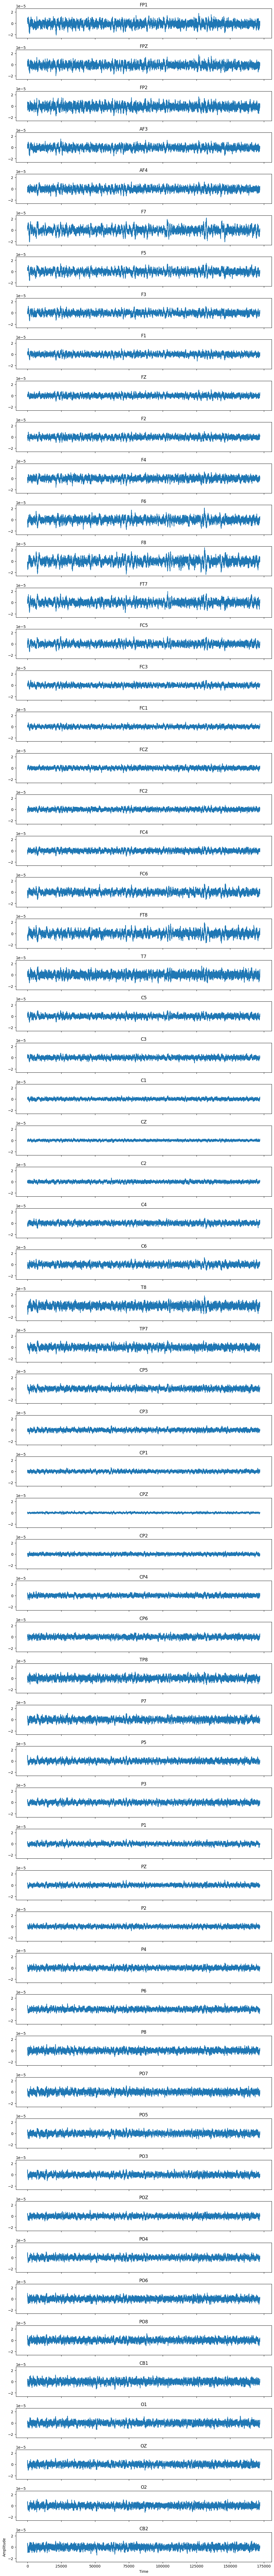

In [103]:
#We select which is the number of samples of the general trial that We want the code show us
samples = 172001

fig, signals_ax = plt.subplots(n_receptors, 1, sharex=True, sharey=True, figsize=(12, 120))

for i, ax in enumerate(signals_ax):
    ax.plot( general_trials[samples][i] )

# Ajustamos los márgenes de la figura para que los títulos no se superpongan con las gráficas
fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)

for ax, name in zip( signals_ax, channel_names):
    ax.set_title(name)
    
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Mostramos la figura
plt.show()

Now We can try to get a general trial for all the trials no matter the duration differences. But in this solution We are going
to create new values to solve the duration problem. No matter how We do it, this will afect to the result. But It's necesary if
We are going the same method We use above to get that general trial.

If We want to equal the duration of the signals, first We need to choose which will be the new duration.
To choose which will be that value, We're are going to see how our data is distributed:

(array([48., 24., 48.,  0., 48.]),
 array([100001., 115001., 130001., 145001., 160001., 175001.]),
 <BarContainer object of 5 artists>)

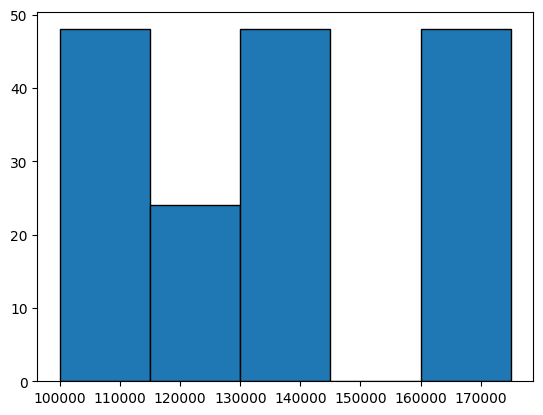

In [41]:
plt.hist(len_trials, edgecolor='black', bins=5)

Observing the graphic We can guees that the lenghts don't follow a normal distribution. To be sure We make use of the Shapiro-Wilk Test:

In [74]:
shapiro(len_trials)

ShapiroResult(statistic=0.872752845287323, pvalue=9.571070325176123e-11)

In [47]:
#median, mean, max, min
np.median(np.array(len_trials) ),  np.mean(np.array(len_trials) ), max(len_trials), min(len_trials)

(133001.0, 137143.85714285713, 175001, 100001)

We know than in a Shapiro test if the p-value of the test is greater than `α = .05`, then the data is assumed to be normally distributed.
Which is not the case, so the durations of our trials aren't normally distributed. That's why It's better to choose the median an not the mean of the durations. But We are not going to use neither of those has the duration to equal all the trials. Because We suspect that the moment where the subject in a trial feels the emotion that the video tries to portray can durate almost all the video or just an interval which can be at the beggining or at the end of the trial.

If We choose the median or the mean. We will need to cut the signals of the trials, and We can lose in that process that information, that's why We are going to choose the highest duration as the duration to equal the rest of signals

Now let's answer: How to equal the duration of two trials?

There are different ways to do it, In this case We are going to repeat each signal of the trial until it reachs the desired new duration.

We can check that the function that We created for this purpose works:

In [105]:
trials[0].shape

(62, 172001)

In [111]:
new_trial_1 = equal_samples(trials[0], 200000)

In [112]:
new_trial_1.shape

(62, 200000)

Finally let's apply the idea:

In [15]:
#Code to create the general trial for an emotion 
new_trials = []
for trial in trials:
    new_trials.append(equal_samples( trial , max(len_trials) ) )

In [14]:
new_trials[8].shape

(62, 175001)

In [31]:
g_trial = get_general_trial(new_trials, n_receptors, max(len_trials) )

Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!
Wahooo!


Once We got the general trial, let's see the result:

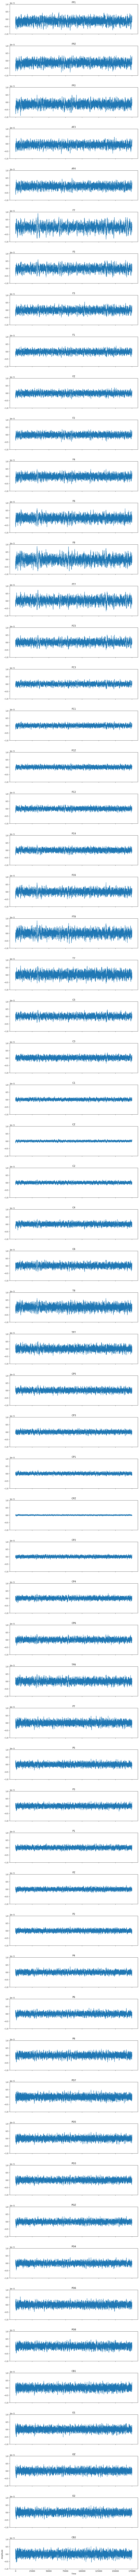

In [33]:
fig, signals_ax = plt.subplots(n_receptors, 1, sharex=True, sharey=True, figsize=(12, 240))

for i, ax in enumerate(signals_ax):
    ax.plot( g_trial[i] )

# Ajustamos los márgenes de la figura para que los títulos no se superpongan con las gráficas
fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)

for ax, name in zip( signals_ax, channel_names):
    ax.set_title(name)
    
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Mostramos la figura
plt.show()